# Swap Curve Bootstrapper

In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
from datetime import datetime, timedelta
from helpers import *
from collections import OrderedDict
from scipy.optimize import least_squares, minimize
from scipy.interpolate import interp1d

from sample_curve import *

import calendar as cd
import math
import scipy
import warnings
import numpy as np
import pandas as pd

%matplotlib inline

In [28]:
s23 = SwapCurve(settle, 'log-linear')
for inst in s23_instruments: s23.add_inst(inst)
s23.add_knots()

stripper = CurveStripper()
result = stripper.strip_curve(s23, interpolation='log-linear', interp_on='df')

res = dict(zip(result.knots, result.knots_dfs))
df = pd.DataFrame({'DF':list(res.values())}, index=list(res.keys()))
df['DF_init'] = np.exp(-result.knots_par_rates * result.knots_taus)
df['DF_BBG'] = np.append(1, bbg_df)
df['ZC'] = -np.log(df['DF']) / s23.knots_taus*100
df['ZC_BBG'] = np.append(np.nan, bbg_zc)
df

,DF,DF_init,DF_BBG,ZC,ZC_BBG
2020-12-03,1.000000,NaN,1.000000,NaN,NaN
2021-03-03,0.999451,0.999444,0.999430,0.222804,0.23363
2021-03-17,0.999360,0.999324,0.999311,0.224863,0.24435
2021-06-16,0.998861,0.998932,0.998794,0.213335,0.22705
2021-09-15,0.998376,0.998473,0.998291,0.207397,0.21903
2021-12-15,0.997873,0.997885,0.997765,0.206157,0.21719
2022-03-16,0.997250,0.996800,0.997128,0.214797,0.22479
2022-06-15,0.996648,0.996255,0.996506,0.219253,0.22893
2022-12-05,0.995346,0.995344,0.995283,0.232612,0.23611
2023-12-04,0.991716,0.991708,0.991559,0.277039,0.28257


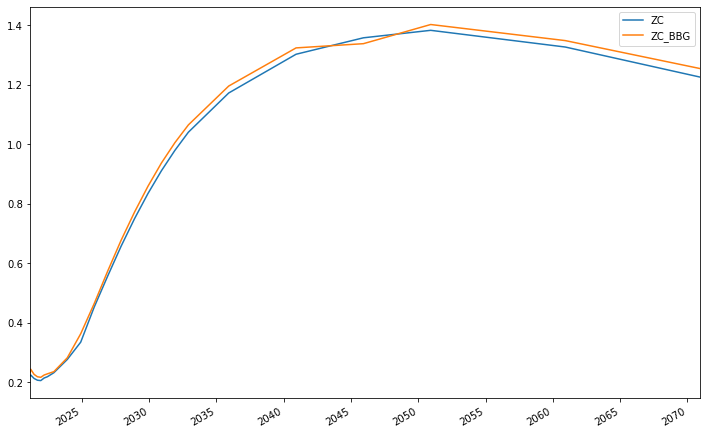

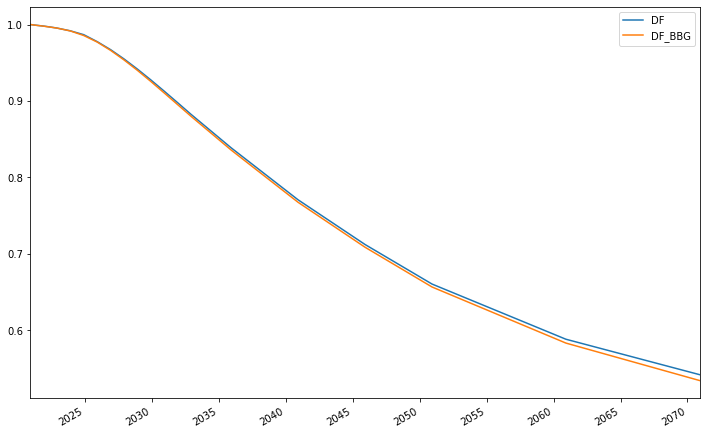

In [13]:
df[['ZC', 'ZC_BBG']][1:].plot(figsize=(12,8))
df[['DF','DF_BBG']].plot(figsize=(12,8))

In [31]:
t_i = np.arange(0, 50, 0.5)
t_j = np.arange(0.5, 50.5, 0.5)
fwds = s23.get_fwds(t_i, t_j) * 100

fwd_df = pd.DataFrame({'FWD-LogLin':fwds},index=t_j)

In [29]:
s23_cubic = SwapCurve(settle, 'cubic')
for inst in s23_instruments: s23_cubic.add_inst(inst)
s23_cubic.add_knots()

stripper = CurveStripper()
result_cubic = stripper.strip_curve(s23_cubic, interpolation='cubic', interp_on='df')

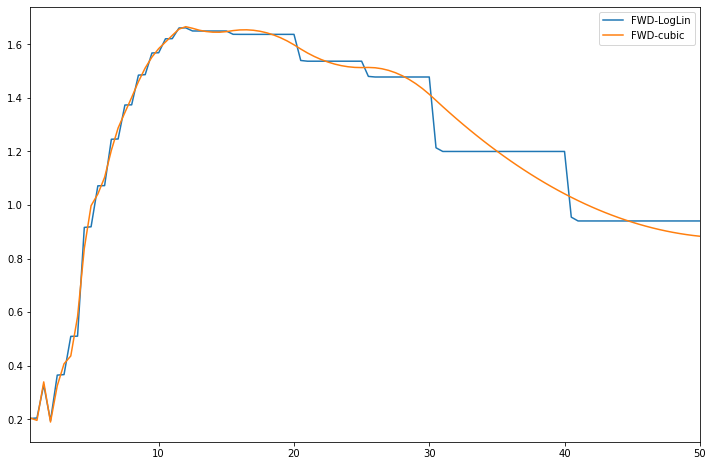

In [32]:
fwd_df['FWD-cubic'] = s23_cubic.get_fwds(t_i, t_j) * 100

fwd_df.plot(figsize=(12,8))